# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.
len(mouse_study["Mouse ID"].unique())

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_study[mouse_study.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].unique()


array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_study.loc[(mouse_study["Mouse ID"] == "g989"), :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study.loc[(mouse_study["Mouse ID"] != "g989"), :]
clean_mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [15]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study["Mouse ID"].unique())

248

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_values = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_values = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_values = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stddev_values = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
def sem(x):
    return np.std(x, ddof=1) / np.sqrt(len(x))

sem_values = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(sem)

# Assemble the resulting series into a single summary DataFrame.
tumor_vol_stats = pd.DataFrame({"Mean Tumor Volume": mean_values, "Median Tumor Volume": median_values, 
                                "Tumor Volume Variance": variance_values, "Tumor Volume Std. Dev.": stddev_values, "Tumor Volume Std. Err.": sem_values})

tumor_vol_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_vol_stats2 = clean_mouse_study.groupby("Drug Regimen").agg(
    mean= ("Tumor Volume (mm3)", "mean"),
    median= ("Tumor Volume (mm3)", "median"),
    var= ("Tumor Volume (mm3)", "var"),
    std = ("Tumor Volume (mm3)", "std"),
    sem = ("Tumor Volume (mm3)", sem))

tumor_vol_stats2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

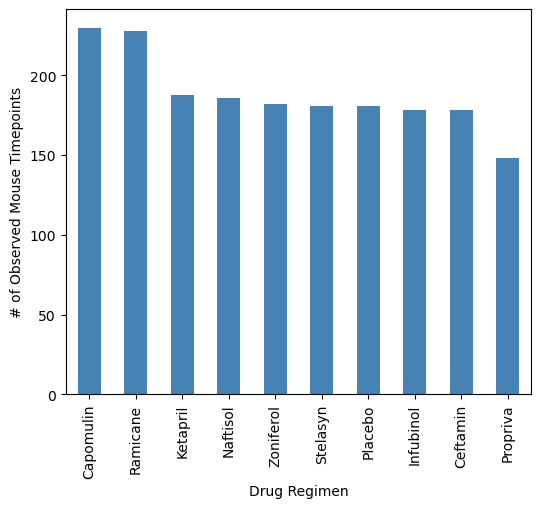

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_data = clean_mouse_study["Drug Regimen"].value_counts()

fig1 = drug_data.plot(kind="bar", facecolor= "steelblue", figsize=(6,5),
                      xlabel = "Drug Regimen",
                      ylabel = "# of Observed Mouse Timepoints")

xticklabels = drug_data.index
fig1.set_xticklabels(xticklabels, rotation = 90)

plt.show

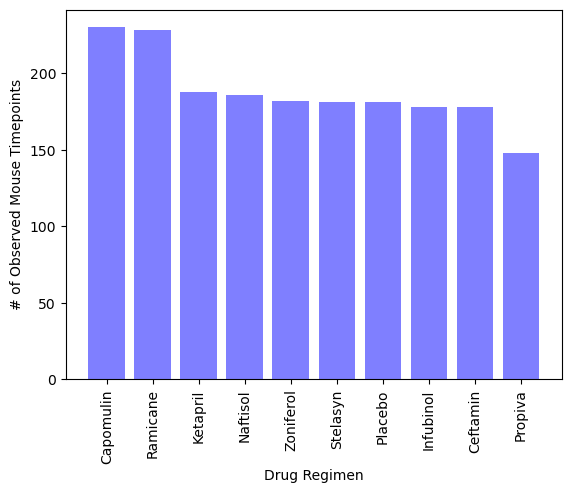

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(drug_data))

plt.bar(x_axis, drug_data, color='b', alpha=.5, align = "center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol",
                           "Zoniferol", "Stelasyn", "Placebo", "Infubinol",
                           "Ceftamin", "Propiva"], rotation=90)


plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

plt.show()

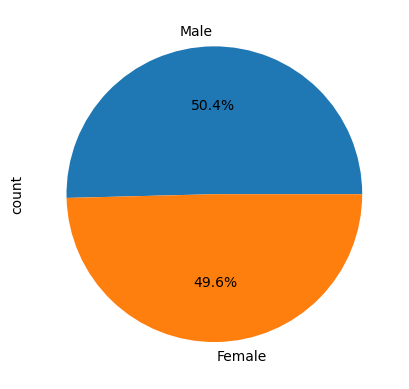

In [27]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_mouse_study.drop_duplicates(subset=["Mouse ID"])
males = len(unique_mice.loc[unique_mice["Sex"] == "Male", :])
females = len(unique_mice.loc[unique_mice["Sex"] == "Female", :])


# Make the pie chart
pie_data = pd.DataFrame({"Sex": ["Male", "Female"],
            "count": [males, females]})

pie_data.set_index("Sex")["count"].plot(kind="pie", autopct="%1.1f%%")
plt.show()

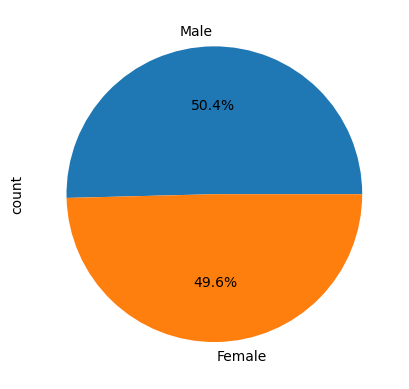

In [29]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_mouse_study.drop_duplicates(subset=["Mouse ID"])
males = len(unique_mice.loc[unique_mice["Sex"] == "Male", :])
females = len(unique_mice.loc[unique_mice["Sex"] == "Female", :])

# Make the pie chart
labels = ["Male", "Female"]
sizes = [males, females]
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.ylabel("count")
plt.show()


## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = clean_mouse_study.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_vol = pd.merge(clean_mouse_study, max_time, on="Mouse ID")
last_tumor_vol

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,0,45.000000,0,Ketapril,Female,2,29,35
3,a457,0,45.000000,0,Ketapril,Female,11,30,10
4,c819,0,45.000000,0,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45
1876,u364,45,31.023923,3,Capomulin,Male,18,17,45
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1878,x773,45,58.634971,4,Placebo,Female,21,30,45


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_tumor_vol.iterrows():
    if row["Drug Regimen"] in treatments:
        if row["Timepoint_x"] == row["Timepoint_y"]:
            tumor_vol_data.append((row["Drug Regimen"], row["Tumor Volume (mm3)"]))

# lists to hold tumor volumes at last timepoint for each treatment
ceftamin = []
capomulin = []
ramicane = []
infubinol = []

# placing the tumor data in the right treatment list
for data in tumor_vol_data:
    if data[0] == "Ceftamin":
        ceftamin.append(data[1])
    elif data[0] == "Capomulin": 
        capomulin.append(data[1])
    elif data[0] == "Ramicane": 
        ramicane.append(data[1])
    else: 
        infubinol.append(data[1])
        
# Determine outliers using upper and lower bounds using a function that will apply to each treatment
def interquartile(drug):
    quartiles = pd.Series(drug).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq + (1.5*iqr)
    for value in drug:
        if value > upperbound or value < lowerbound:
            return (value)
            
print(f"Capomulin's potential outliers: {interquartile(capomulin)}")
print(f"Ramicane's potential outliers: {interquartile(ramicane)}") 
print(f"Infubinol's potential outliers: {interquartile(infubinol)}") 
print(f"Ceftamin's potential outliers: {interquartile(ceftamin)}") 


Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 36.3213458
Ceftamin's potential outliers: None


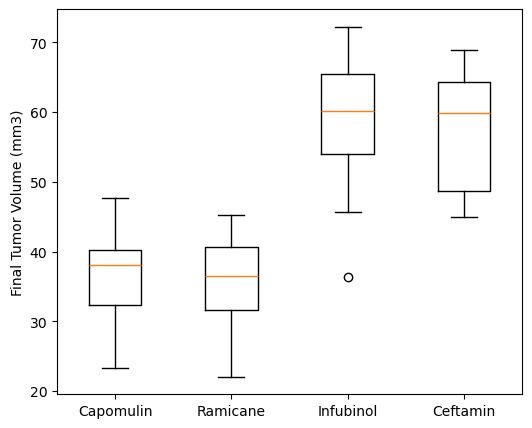

In [36]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
ig1, ax1 = plt.subplots(figsize=(6,5))
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot([capomulin, ramicane, infubinol, ceftamin])
plt.xticks(ticks=[1,2,3,4], labels = treatments)
plt.show()

## Line and Scatter Plots

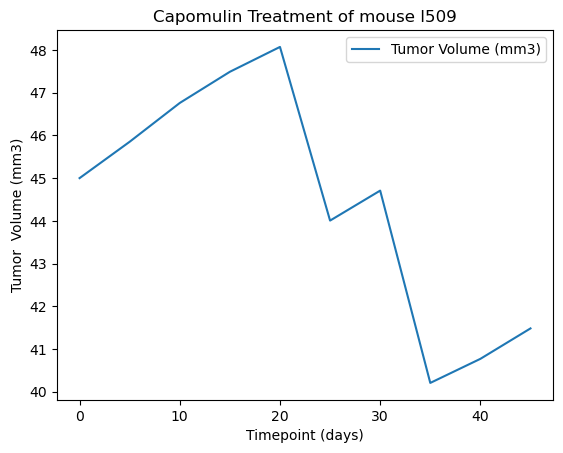

In [39]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filtering for single mouse
single_mouse = clean_mouse_study.loc[clean_mouse_study["Mouse ID"] == "l509"]

# Generating the plot
single_mouse.plot(x="Timepoint", y="Tumor Volume (mm3)")
plt.title("Capomulin Treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor  Volume (mm3)")
plt.show()
           

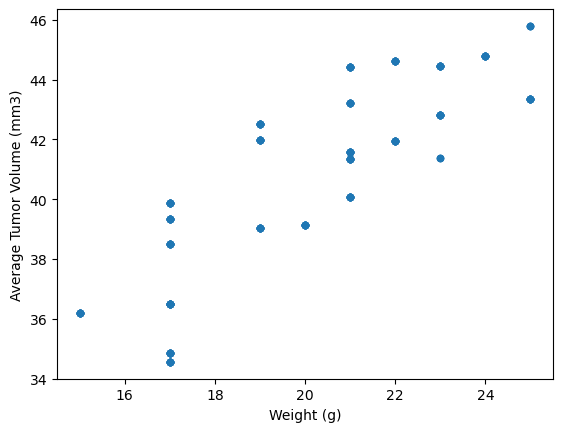

In [52]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Getting average tumor volume using groupby
average_tumor = clean_mouse_study.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merging the groupby dataframe with the cleaned dataframe
avg_tumor_vol = pd.merge(clean_mouse_study, average_tumor, on="Mouse ID")

# Filtering for Capomulin
capomulin = avg_tumor_vol.loc[avg_tumor_vol["Drug Regimen"] == "Capomulin"]

# Creating the scatter plot
capomulin.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)_y")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()               

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


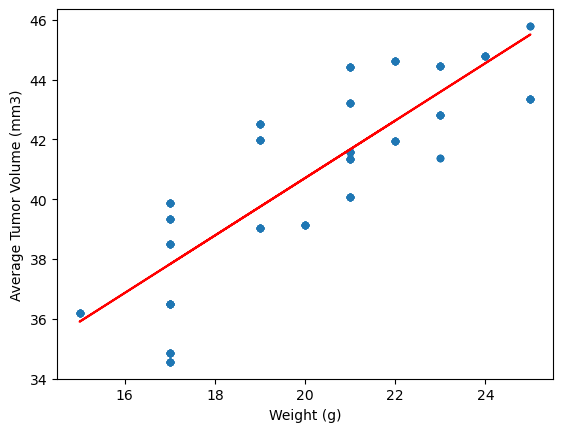

In [48]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin["Weight (g)"], capomulin["Tumor Volume (mm3)_y"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Creating the scatter plot
capomulin.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)_y")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin["Weight (g)"], capomulin["Tumor Volume (mm3)_y"])
regress_values = capomulin["Weight (g)"] * slope + intercept
plt.plot(capomulin["Weight (g)"], regress_values, color="red")
plt.show()               